/var/folders/6s/58ydw6fj7zq_pptx30_mk1j80000gn/T/ipykernel_97969/2357040980.py:29: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z', cmap=cmap)
/var/folders/6s/58ydw6fj7zq_pptx30_mk1j80000gn/T/ipykernel_97969/2357040980.py:40: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x], zdir='x', cmap=cmap)
/var/folders/6s/58ydw6fj7zq_pptx30_mk1j80000gn/T/ipykernel_97969/2357040980.py:35: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y', cmap=cmap)


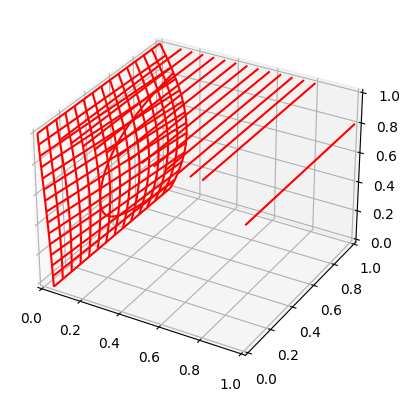

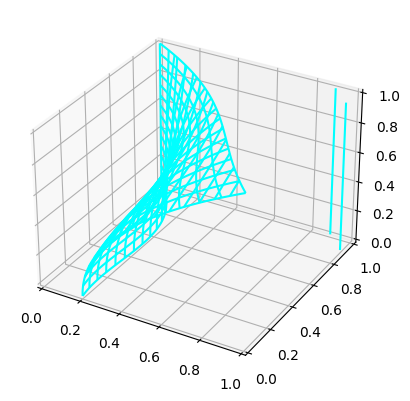

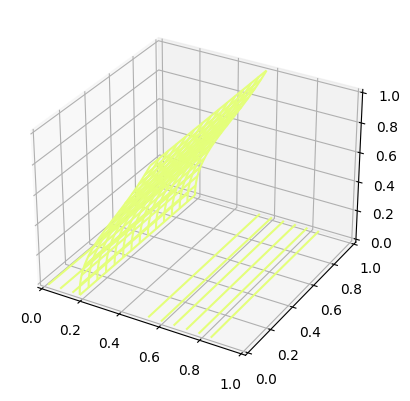

In [30]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

a1 = 0.02
a2 = 0.02
a12 = 0.01
w1 = 0.1
w2 = 0.1
w12 = 0.2
eps = 0.0001
n1 = 800
n2 = 800

def plot_implicit(fn, cmap, bbox=(0,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', cmap=cmap)
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', cmap=cmap)

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x', cmap=cmap)

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
def F(X,Y,Z):
    return (1 - X) * (a1 + eps * (n1 * (X**2) + n2 * (Z**2))) - (w1 * X)

def G(X,Y,Z):
    return (1 - Y) * (a2 + eps * (n2 * (Y**2) + n1 * (Z**2))) - (w2 * X)

def H(X,Y,Z):
    return (1 - Z) * (a12 + (eps * Z * (n1 * X + n2 * Y))) - (w12 * X)

plot_implicit(H, 'autumn')
plot_implicit(G, 'cool')
plot_implicit(F, 'Wistia')
plt.show()